In [1]:
%load_ext autoreload
%autoreload 2

In [31]:
%matplotlib inline  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from utils import COLOR_COLUMNS, BAND_CALIB_COLUMNS, BAND_PAIRS, COLOR_PAIRS, process_kids, clean_sdss, describe_column, \
                  cut_u_g, cut_r
from utils_plotting import plot_class_histograms, plot_confusion_matrix

In [37]:
def show_intersection(ds1, ds2):

    intersect_id = ds1['ID'].loc[ds1['ID'].isin(ds2['ID'])]
    ds1_int = ds1.loc[ds1['ID'].isin(intersect_id)]
    ds2_int = ds2.loc[ds2['ID'].isin(intersect_id)]

    ds1_int = ds1_int.sort_values(by='ID')
    ds2_int = ds2_int.sort_values(by='ID')

    ds1_qso_int = ds1_int.loc[ds1_int['CLASS'] == 'QSO']

    print('Elements in intersection: {}'.format(len(intersect_id)))
    print('DS1 QSOs in intersection: {}'.format(ds1_qso_int.shape[1]))

    print(describe_column(ds1['CLASS']))
    print(describe_column(ds2['CLASS']))

    print(describe_column(ds1_int['CLASS']))
    print(describe_column(ds2_int['CLASS']))

    cnf_matrix_1 = confusion_matrix(ds1_int['CLASS'], ds2_int['CLASS'])
    cnf_matrix_2 = confusion_matrix(ds2_int['CLASS'], ds1_int['CLASS'])
    class_names = np.unique(ds1_int['CLASS'])

    plt.figure()
    plot_confusion_matrix(cnf_matrix_1, classes=class_names, title='Confusion matrix, without normalization')
    
    plt.figure()
    plot_confusion_matrix(cnf_matrix_1, classes=class_names, normalize=True, title='Normalized confusion matrix')
    
    plt.figure()
    plot_confusion_matrix(cnf_matrix_2, classes=class_names, normalize=True, title='Normalized confusion matrix')
    plt.show()

# mags vs colors

In [4]:
catalog_mags = pd.read_csv('outputs/catalogs/KiDS_DR3_x_SDSS_DR14_sdss-clean_rf-clf_f-all_cut-r__2018-08-27_14:37:20.csv')
catalog_colors = pd.read_csv('outputs/catalogs/KiDS_DR3_x_SDSS_DR14_sdss-clean_rf-clf_f-no-mags_cut-u-g__2018-10-05_15:21:31.csv')

Elements in intersection: 3369825
DS1 QSOs in intersection: 18
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([2012086,  192527, 1187967]), array([ 59.30843193,   5.67494355,  35.01662452]))
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([4114106, 1205263, 1312622]), array([ 62.03425186,  18.17347159,  19.79227656]))
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([2005076,  178071, 1186678]), array([ 59.50089396,   5.28428034,  35.2148257 ]))
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([1957472,  177623, 1234730]), array([ 58.088239  ,   5.27098588,  36.64077511]))


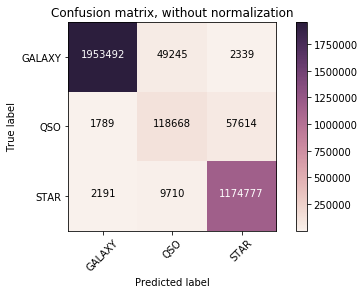

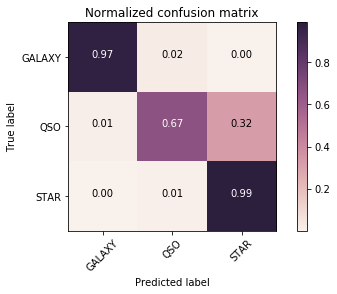

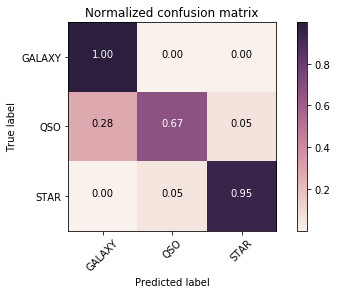

In [38]:
show_intersection(catalog_mags, catalog_colors)